In [1]:
from common import colors, sbarlw

In [2]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/home/eharkin/projects/5HTGIF-dev


In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from ezephys import pltools
import ezephys.stimtools as st

from grr.iGIF import iGIF_NP
from grr.ThresholdModel import constructMedianModel

In [4]:
plt.style.use(os.path.join('figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'GIF_demo_traces')

# Demo traces for models

In [5]:
MODEL_PATH = os.path.join('data', 'models', '5HT')

In [6]:
with open(os.path.join(MODEL_PATH, '5HT_AugmentedGIFs.lmod'), 'rb') as f:
    models = pickle.load(f)

median_agif = constructMedianModel(type(models[0]), models)

with open(os.path.join(MODEL_PATH, '5HT_GIFs.lmod'), 'rb') as f:
    models = pickle.load(f)
    
median_gif = constructMedianModel(type(models[0]), models)

del models

with open(os.path.join(MODEL_PATH, '5HT_iGIF_NPs.lmod'), 'rb') as f:
    iGIFs = pickle.load(f)
    
del f

In [7]:
step_input = st.StepStimulus([200, 500, 500], [0, 0.040, 0.080], dt=0.1)

In [8]:
def replace_value(x, initial_value, replace_with):
    arr = np.copy(x)
    arr[arr == initial_value] = replace_with
    return arr

In [9]:
spec = gs.GridSpec(
    8, 
    1, 
    height_ratios=(0.1, 0.7, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2), 
    hspace=0.05,
    left=0.25,
    right=0.8,
    bottom=0.05,
    top=0.95
)

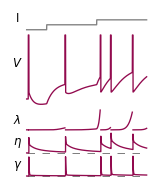

In [10]:
plt.figure(figsize=(2, 2))

plt.subplot(spec[0, :])
step_input.plot(color=colors['input'], clip_on=False)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('I', rotation=0)
plt.xlabel('')

gif_sim = median_gif.simulate(step_input.command.flatten(), median_gif.El, return_dict=True)

plt.subplot(spec[1, :])
plt.plot(gif_sim['time'], replace_value(gif_sim['V'], 0., 40), color=colors['gif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$V$', rotation=0)

plt.subplot(spec[2, :])
plt.plot(gif_sim['time'], replace_value(gif_sim['firing_intensity'], 0., np.nan), color=colors['gif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\lambda$', rotation=0, va='center')

plt.subplot(spec[3, :])
plt.plot([0, gif_sim['time'][-1]], [0, 0], ls='--', lw=0.3, dashes=(15, 15), color='k', clip_on=False)
plt.plot(gif_sim['time'], gif_sim['eta_sum'], color=colors['gif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\eta$', rotation=0, va='center')

plt.subplot(spec[4, :])
plt.plot([0, gif_sim['time'][-1]], [0, 0], ls='--', lw=0.3, dashes=(15, 15), color='k', clip_on=False)
plt.plot(gif_sim['time'], gif_sim['gamma_sum'], color=colors['gif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\gamma$', rotation=0, va='center')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'GIF_demo.png'))

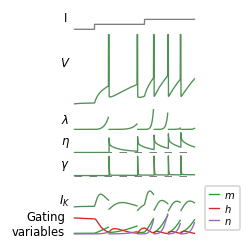

In [11]:
plt.figure(figsize=(2, 2))

plt.subplot(spec[0, :])
step_input.plot(color=colors['input'], clip_on=False)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('I', rotation=0)
plt.xlabel('')

agif_sim = median_agif.simulate(step_input.command.flatten(), median_gif.El, return_dict=True)

plt.subplot(spec[1, :])
plt.plot(agif_sim['time'], replace_value(agif_sim['V'], 0., 40.), color=colors['agif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$V$', rotation=0)

plt.subplot(spec[2, :])
plt.plot(agif_sim['time'], replace_value(agif_sim['firing_intensity'], 0., np.nan), color=colors['agif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\lambda$', rotation=0, va='center')

plt.subplot(spec[3, :])
plt.plot([0, agif_sim['time'][-1]], [0, 0], ls='--', lw=0.3, dashes=(15, 15), color='k', clip_on=False)
plt.plot(agif_sim['time'], agif_sim['eta_sum'], color=colors['agif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\eta$', rotation=0, va='center')

plt.subplot(spec[4, :])
plt.plot([0, agif_sim['time'][-1]], [0, 0], ls='--', lw=0.3, dashes=(15, 15), color='k', clip_on=False)
plt.plot(agif_sim['time'], agif_sim['gamma_sum'], color=colors['agif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\gamma$', rotation=0, va='center')

plt.subplot(spec[6, :])
plt.plot(agif_sim['time'], -replace_value(agif_sim['Ik1'] + agif_sim['Ik2'], 0., np.nan), color=colors['agif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$I_K$', rotation=0, va='center')

plt.subplot(spec[7, :])
plt.plot(agif_sim['time'], replace_value(agif_sim['m'], 0., np.nan), color=colors['m'], label='$m$')
plt.plot(agif_sim['time'], replace_value(agif_sim['h'], 0., np.nan), color=colors['h'], label='$h$')
plt.plot(agif_sim['time'], replace_value(agif_sim['n'], 0., np.nan), color=colors['n'], label='$n$')
pltools.hide_border('a')
pltools.hide_ticks()
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.ylabel('Gating\nvariables', ha='right', rotation=0, va='center')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'AugmentedGIF_demo.png'))

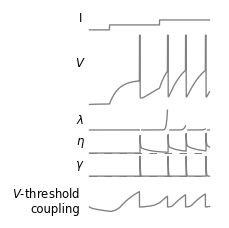

In [12]:
plt.figure(figsize=(2, 2))

plt.subplot(spec[0, :])
step_input.plot(color=colors['input'], clip_on=False)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('I', rotation=0)
plt.xlabel('')

igif_model = iGIF_NP()
igif_model.copyParametersFrom(iGIFs[0])
igif_model.theta_bins = np.array([-90, -70., -65., -60., -55., -50., -45., -40., -10.])
igif_model.theta_i = np.array([-10, -5., -2.5, 0., 1., 2., 5., 10.])
igif_model.theta_tau = 250.
igif_model.DV = 2.

igif_sim = igif_model.simulate(step_input.command.flatten(), median_gif.El, return_dict=True)

plt.subplot(spec[1, :])
plt.plot(igif_sim['time'], replace_value(igif_sim['V'], 0., 40.), color=colors['igif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$V$', rotation=0)

plt.subplot(spec[2, :])
plt.plot(igif_sim['time'], replace_value(igif_sim['firing_intensity'], 0., np.nan), color=colors['igif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\lambda$', rotation=0, va='center')

plt.subplot(spec[3, :])
plt.plot([0, igif_sim['time'][-1]], [0, 0], ls='--', lw=0.3, dashes=(15, 15), color='k', clip_on=False)
plt.plot(igif_sim['time'], igif_sim['eta_sum'], color=colors['igif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\eta$', rotation=0, va='center')

plt.subplot(spec[4, :])
plt.plot([0, igif_sim['time'][-1]], [0, 0], ls='--', lw=0.3, dashes=(15, 15), color='k', clip_on=False)
plt.plot(igif_sim['time'], igif_sim['gamma_sum'], color=colors['igif'], clip_on=True)
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$\gamma$', rotation=0, va='center')

plt.subplot(spec[6, :])
plt.plot(igif_sim['time'], igif_sim['theta'], color=colors['igif'])
pltools.hide_border('a')
pltools.hide_ticks()
plt.ylabel('$V$-threshold\ncoupling', rotation=0, va='center', ha='right')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'iGIF_NP_demo.png'))
    plt.savefig(os.path.join(IMG_PATH, 'iGIF_NP_demo.svg'))

# Sample training/test set data

In [13]:
EPHYS_PATH = os.path.join('data', 'processed')

ephys = {}
for celltype in ['5HT', 'GABA', 'mPFC']:
    with open(os.path.join(EPHYS_PATH, '{}_fastnoise'.format(celltype), '{}_goodcells.ldat'.format(celltype)), 'rb') as f:
        ephys[celltype] = pickle.load(f)

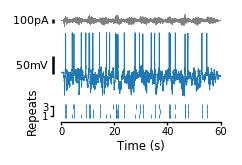

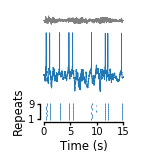

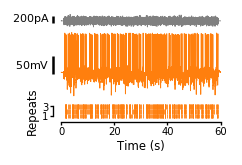

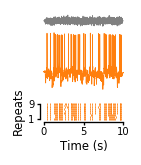

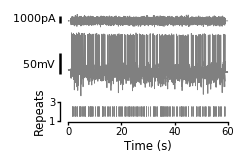

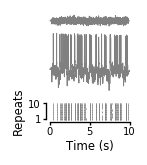

In [14]:
example_cell_inds = [0, 5, 3]

ephys_spec = gs.GridSpec(3, 1, height_ratios=[0.2, 1, 0.3], hspace=0.05, left=0.22, bottom=0.2, right=0.95, top=0.95)

for example_cell_ind, celltype, color in zip(example_cell_inds, ['5HT', 'GABA', 'mPFC'], ['ser', 'som', 'pyr']):
    
    # Generate training set plot
    plt.figure(figsize=(2, 1.2))

    plt.subplot(ephys_spec[0, :])
    plt.plot(
        ephys[celltype][example_cell_ind].trainingset_traces[0].getTime() * 1e-3,
        ephys[celltype][example_cell_ind].trainingset_traces[0].I * 1e3,
        color=colors['input'],
        lw=0.5
    )
    xlims = plt.xlim()
    current_ylims = plt.ylim()
    pltools.add_scalebar(y_units='pA', anchor=(0, 0.3), omit_x=True, linewidth=sbarlw)
    pltools.hide_border('a')
    pltools.hide_ticks()

    plt.subplot(ephys_spec[1, :])
    plt.plot(
        ephys[celltype][example_cell_ind].trainingset_traces[0].getTime() * 1e-3,
        ephys[celltype][example_cell_ind].trainingset_traces[0].V,
        color=colors[color],
        lw=0.5
    )
    plt.xlim(xlims)
    voltage_ylims = plt.ylim()
    pltools.add_scalebar(y_units='mV', y_size=50, anchor=(0, 0.3), omit_x=True, linewidth=sbarlw)
    pltools.hide_border('a')
    pltools.hide_ticks()

    plt.subplot(ephys_spec[2, :])
    plt.eventplot(
        [tr.getSpikeTimes() * 1e-3 for tr in ephys[celltype][example_cell_ind].trainingset_traces], 
        color=colors[color], 
        lw=0.5
    )
    plt.xlim(xlims)
    plt.yticks([0, 2], [1, 3])
    plt.ylabel('Repeats')
    plt.xticks([0, 20, 40, 60])
    plt.xlabel('Time (s)')
    pltools.hide_border('tr', trim=True)

    if IMG_PATH is not None:
        plt.savefig(os.path.join(IMG_PATH, '{}_sample_training_set.png'.format(color)))
        plt.savefig(os.path.join(IMG_PATH, '{}_sample_training_set.svg'.format(color)))
    
    # Generate test set plot
    plt.figure(figsize=(1.0, 1.2))

    plt.subplot(ephys_spec[0, :])
    plt.plot(
        ephys[celltype][example_cell_ind].testset_traces[0].getTime() * 1e-3,
        ephys[celltype][example_cell_ind].testset_traces[0].I * 1e3,
        color=colors['input'],
        lw=0.5
    )
    plt.ylim(current_ylims)
    xlims = plt.xlim()
    pltools.hide_border('a')
    pltools.hide_ticks()

    plt.subplot(ephys_spec[1, :])
    plt.plot(
        ephys[celltype][example_cell_ind].testset_traces[0].getTime() * 1e-3,
        ephys[celltype][example_cell_ind].testset_traces[0].V,
        color=colors[color],
        lw=0.5
    )
    plt.ylim(voltage_ylims)
    plt.xlim(xlims)
    pltools.hide_border('a')
    pltools.hide_ticks()

    plt.subplot(ephys_spec[2, :])
    plt.eventplot(
        [tr.getSpikeTimes() * 1e-3 for tr in ephys[celltype][example_cell_ind].testset_traces],
        color=colors[color],
        lw=0.5
    )
    plt.xlim(xlims)
    plt.xlabel('Time (s)')
    plt.ylabel('Repeats')
    
    if celltype in ['5HT', 'GABA']:
        plt.yticks([0, 8], [1, 9])
        if celltype == '5HT':
            plt.xticks([0, 5, 10, 15])
        else:
            plt.xticks([0, 5, 10])
    else:
        plt.yticks([0, 9], [1, 10])
        plt.xticks([0, 5, 10])

    pltools.hide_border('tr', trim=True)
    plt.subplots_adjust(left=0.27)

    if IMG_PATH is not None:
        plt.savefig(os.path.join(IMG_PATH, '{}_sample_test_set.png'.format(color)))
        plt.savefig(os.path.join(IMG_PATH, '{}_sample_test_set.svg'.format(color)))